<a href="https://colab.research.google.com/github/munevardo/ciencia-de-datos-estadistica/blob/main/estadistica_trabajo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
'''

DESCRIPCIÓN DEL PROYECTO

# Análisis de Datos Inmobiliarios Urbanos
Una empresa inmobiliaria líder en una gran ciudad está buscando comprender
en profundidad el mercado de viviendas urbanas para tomar decisiones estratégicas
más informadas. La empresa posee una base de datos extensa que contiene información
detallada sobre diversas propiedades residenciales disponibles en el mercado. Se requiere
realizar un análisis holístico de estos datos para identificar patrones, relaciones y
segmentaciones relevantes que permitan mejorar la toma de decisiones en cuanto a la compra,
 venta y valoración de propiedades.

1. Análisis de Componentes Principales: Reducir la dimensionalidad del conjunto de datos y
visualizar la estructura de las variables en componentes principales para identificar
características clave que influyen en la variación de precios y oferta del mercado.

2. Análisis de Conglomerados: Agrupar las propiedades residenciales en segmentos
  homogéneos con características similares para entender las dinámicas de las ofertas
   específicas en diferentes partes de la ciudad y en diferentes estratos socioeconómicos.

3. Análisis de Correspondencia : Examinar la relación entre las variables categóricas
(tipo de vivienda, zona y barrio), para identificar patrones de comportamiento de la
oferta en mercado inmobiliario.

Visualización de resultados: Presentar gráficos, mapas y otros recursos visuales para comunicar
 los hallazgos de manera clara y efectiva a la dirección de la empresa.
'''

'\n\nDESCRIPCIÓN DEL PROYECTO\n\n# Análisis de Datos Inmobiliarios Urbanos\nUna empresa inmobiliaria líder en una gran ciudad está buscando comprender\nen profundidad el mercado de viviendas urbanas para tomar decisiones estratégicas\nmás informadas. La empresa posee una base de datos extensa que contiene información\ndetallada sobre diversas propiedades residenciales disponibles en el mercado. Se requiere\nrealizar un análisis holístico de estos datos para identificar patrones, relaciones y\nsegmentaciones relevantes que permitan mejorar la toma de decisiones en cuanto a la compra,\n venta y valoración de propiedades.\n\n1. Análisis de Componentes Principales: Reducir la dimensionalidad del conjunto de datos y\nvisualizar la estructura de las variables en componentes principales para identificar\ncaracterísticas clave que influyen en la variación de precios y oferta del mercado.\n\n2. Análisis de Conglomerados: Agrupar las propiedades residenciales en segmentos\n  homogéneos con carac

In [173]:
#installar las librerías necesarias
!pip install prince
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prince

from google.colab import drive

# importat scikit-learn para PCA y clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://raw.githubusercontent.com/munevardo/ciencia-de-datos-estadistica/refs/heads/main/vivienda.csv", encoding="utf-8")


## Etapa 1: Entendimiento de los datos
Antes de comenzar incluso a preprocesar los datos, debemos conocer las características del conjunto de datos que tenemos.

Como mínimo debemos saber:
-  Cuántos registros hay?  8322
-  Cuantos atributos tiene cada registro? 13
-  De qué tipo son los atributos? float y object

Además:
-  Obtener una medida de centralidad para cada atributo
-  Obtener una medida de dispersión o desviación para los atributos que ésto tenga sentido
-  Calcular la matriz de correlación de los atributos de entrada para identificar atributos redundantes

Como paso previo al preprocesamiento de los datos, debemos:
-  Detectar si hay datos faltantes (determinar en qué columnas y cuantos datos faltan en un mismo registro)
-  Detectar si hay datos atípicos
-  Detectar si hay desbalance entre clases

Notar que en esta etapa no hacemos ninguna modificación sobre los datos, sólo estamos conociéndolos a fondo para saber con qué material contamos para trabajar.

In [174]:
# Muestra las primeras filas del DataFrame
print(df.head())

       id          zona  piso  estrato  preciom  areaconst  parqueaderos  \
0  1147.0  Zona Oriente   NaN      3.0    250.0       70.0           1.0   
1  1169.0  Zona Oriente   NaN      3.0    320.0      120.0           1.0   
2  1350.0  Zona Oriente   NaN      3.0    350.0      220.0           2.0   
3  5992.0      Zona Sur   2.0      4.0    400.0      280.0           3.0   
4  1212.0    Zona Norte   1.0      5.0    260.0       90.0           1.0   

   banios  habitaciones         tipo       barrio  longitud  latitud  
0     3.0           6.0         Casa  20 de julio -76.51168  3.43382  
1     2.0           3.0         Casa  20 de julio -76.51237  3.43369  
2     2.0           4.0         Casa  20 de julio -76.51537  3.43566  
3     5.0           3.0         Casa   3 de julio -76.54000  3.43500  
4     2.0           3.0  Apartamento        acopi -76.51350  3.45891  


In [175]:
# Verificar la cantidad de filas y columnas
print(df.shape)

(8322, 13)


In [176]:
# Muestra la información del DataFrame aca podemos ver los tipos de datos y si hay valores nulos vemos que piso, parque, barrio y zona son de tipo object
# y el resto son de tipo float64
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8322 entries, 0 to 8321
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            8319 non-null   float64
 1   zona          8319 non-null   object 
 2   piso          5684 non-null   float64
 3   estrato       8319 non-null   float64
 4   preciom       8320 non-null   float64
 5   areaconst     8319 non-null   float64
 6   parqueaderos  6717 non-null   float64
 7   banios        8319 non-null   float64
 8   habitaciones  8319 non-null   float64
 9   tipo          8319 non-null   object 
 10  barrio        8319 non-null   object 
 11  longitud      8319 non-null   float64
 12  latitud       8319 non-null   float64
dtypes: float64(10), object(3)
memory usage: 845.3+ KB
None


In [177]:
# identifca el tipo de valores en cada columna aca podemos ver que zona y barrio son de tipo "object" variable categórica mientras que las demás son numéricas.
print(df.dtypes)

id              float64
zona             object
piso            float64
estrato         float64
preciom         float64
areaconst       float64
parqueaderos    float64
banios          float64
habitaciones    float64
tipo             object
barrio           object
longitud        float64
latitud         float64
dtype: object


In [178]:
# a partir de acá difernciaremos las variables categóricas de las numéricas para facilitar el análisis posterior
categorical_columns = ['zona','tipo','barrio']
numerical_columns = ['piso', 'estrato','preciom','areaconst', 'parqueaderos','banios', 'habitaciones', 'longitud', 'latitud']


In [179]:
# Muestra las estadísticas descriptivas del DataFrame
df.describe()

,id,piso,estrato,preciom,areaconst,parqueaderos,banios,habitaciones,longitud,latitud
count,8319.000000,5684.000000,8319.000000,8320.000000,8319.000000,6717.000000,8319.000000,8319.000000,8319.000000,8319.000000
mean,4160.000000,3.770936,4.633610,433.891947,174.934938,1.835194,3.111311,3.605361,-76.528606,3.417644
std,2401.632778,2.614802,1.029222,328.647244,142.964126,1.124909,1.428210,1.459537,0.017398,0.042638
min,1.000000,1.000000,3.000000,58.000000,30.000000,1.000000,0.000000,0.000000,-76.589150,3.333000
25%,2080.500000,2.000000,4.000000,220.000000,80.000000,1.000000,2.000000,3.000000,-76.541580,3.380795
50%,4160.000000,3.000000,5.000000,330.000000,123.000000,2.000000,3.000000,3.000000,-76.530000,3.416000
75%,6239.500000,5.000000,5.000000,540.000000,229.000000,2.000000,4.000000,4.000000,-76.518890,3.452000
max,8319.000000,12.000000,6.000000,1999.000000,1745.000000,10.000000,10.000000,10.000000,-76.463000,3.497700


In [180]:
# Verificar si hay valores nulos aca podemos ver que hay 2 valores nulos en piso, 1 en parque, 1 en barrio y 1 en zona
print(df.isnull().sum())

id                 3
zona               3
piso            2638
estrato            3
preciom            2
areaconst          3
parqueaderos    1605
banios             3
habitaciones       3
tipo               3
barrio             3
longitud           3
latitud            3
dtype: int64


In [181]:
# Verificar la cantidad de valores únicos en cada columna
print(df.nunique())


id              8319
zona               5
piso              12
estrato            4
preciom          539
areaconst        652
parqueaderos      10
banios            11
habitaciones      11
tipo               2
barrio           436
longitud        2928
latitud         3679
dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'piso'),
  Text(1, 0, 'estrato'),
  Text(2, 0, 'preciom'),
  Text(3, 0, 'areaconst'),
  Text(4, 0, 'parqueaderos'),
  Text(5, 0, 'banios'),
  Text(6, 0, 'habitaciones'),
  Text(7, 0, 'longitud'),
  Text(8, 0, 'latitud')])

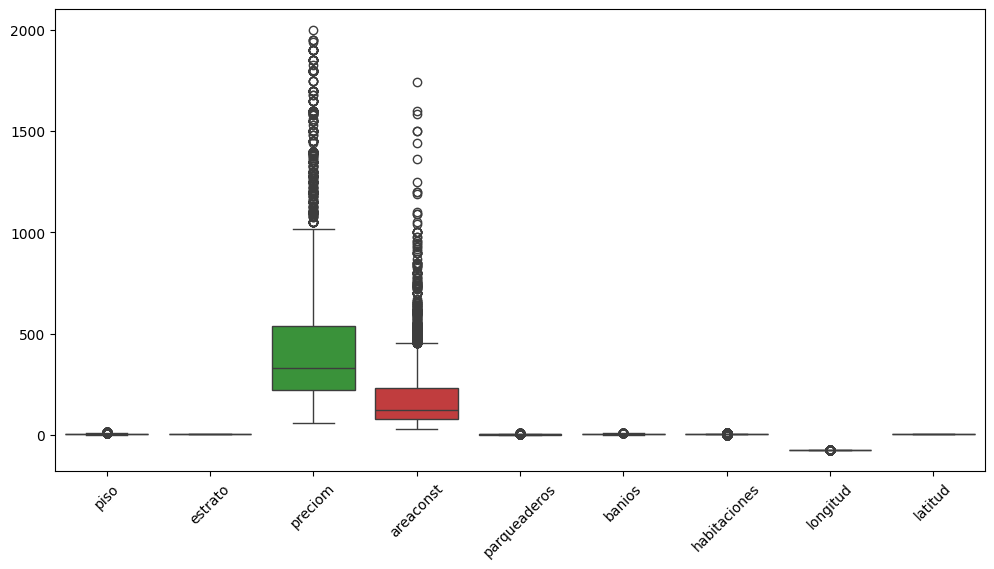

In [182]:
# Diagrama de cajas y bigotes para atributos numéricos excluyendo id que no aporta información relevante para el análisis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['id']))
plt.xticks(rotation=45)

In [183]:
#Medida de centralidad para atributos categóricos
for col in categorical_columns:
    print(f"Moda de {col}: {df[col].mode()[0]}")
    print(f"Frecuencia de la moda en {col}: {df[col].value_counts().max()}")

Moda de zona: Zona Sur
Frecuencia de la moda en zona: 4726
Moda de tipo: Apartamento
Frecuencia de la moda en tipo: 5100
Moda de barrio: valle del lili
Frecuencia de la moda en barrio: 1008


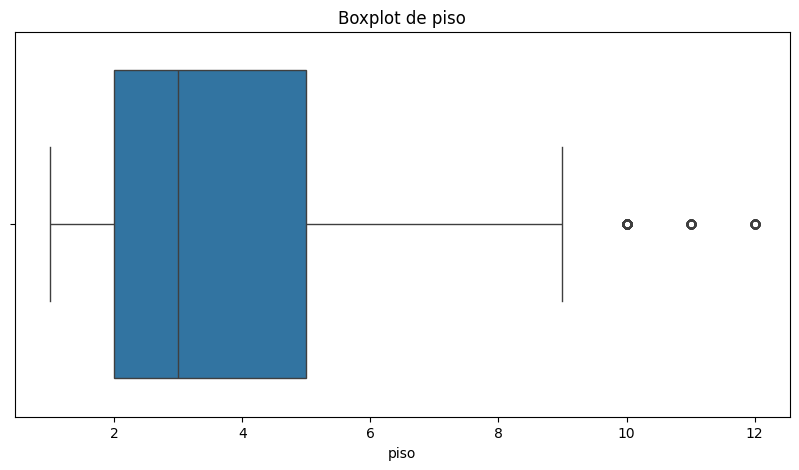

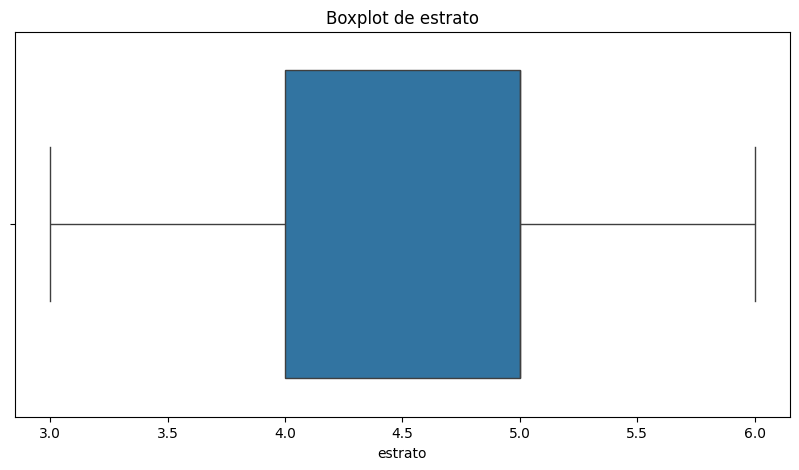

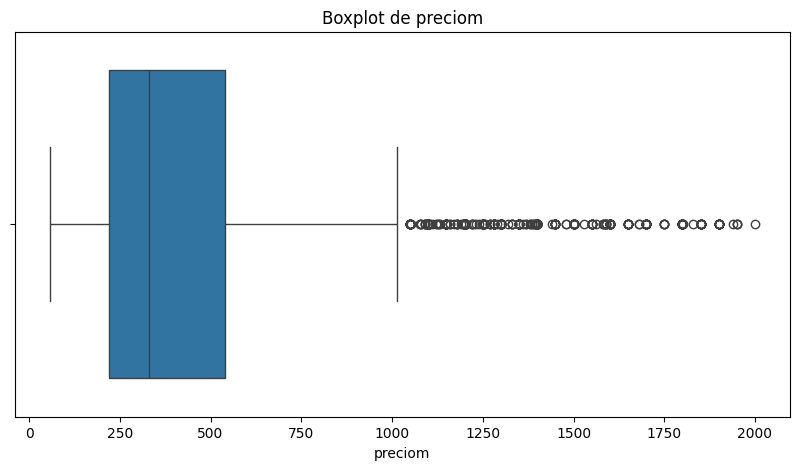

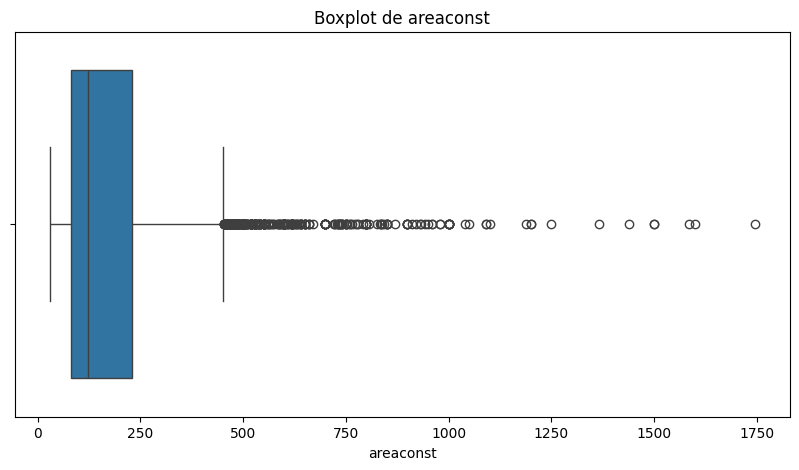

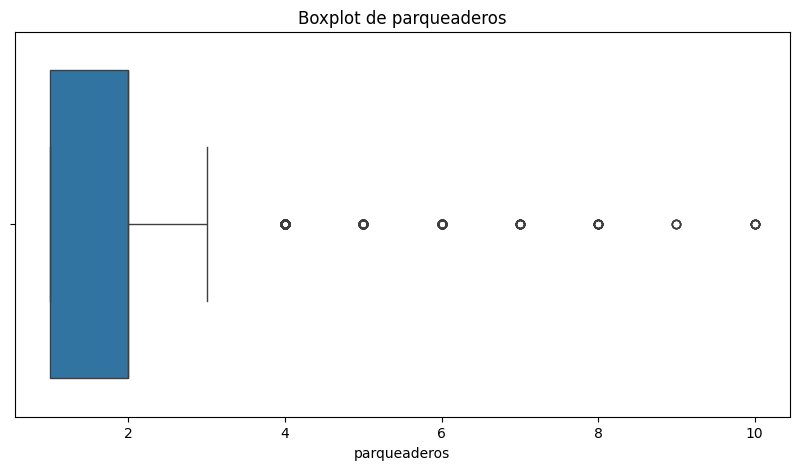

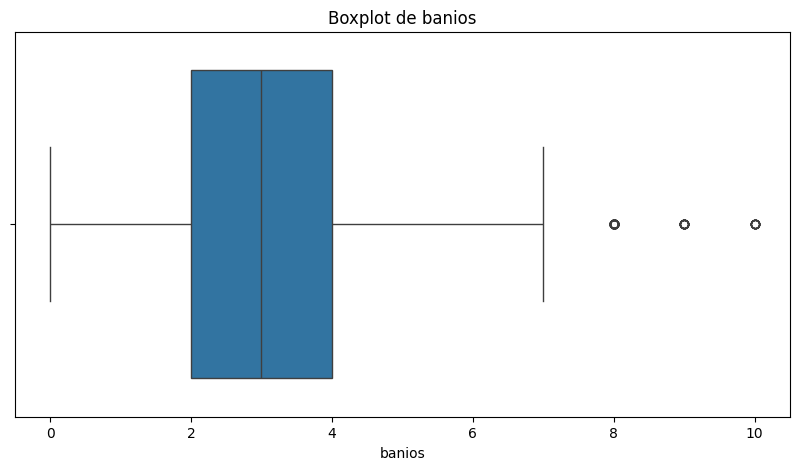

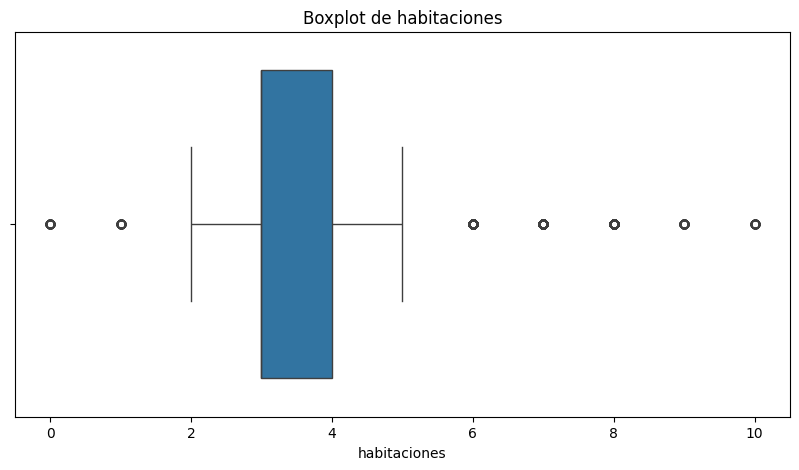

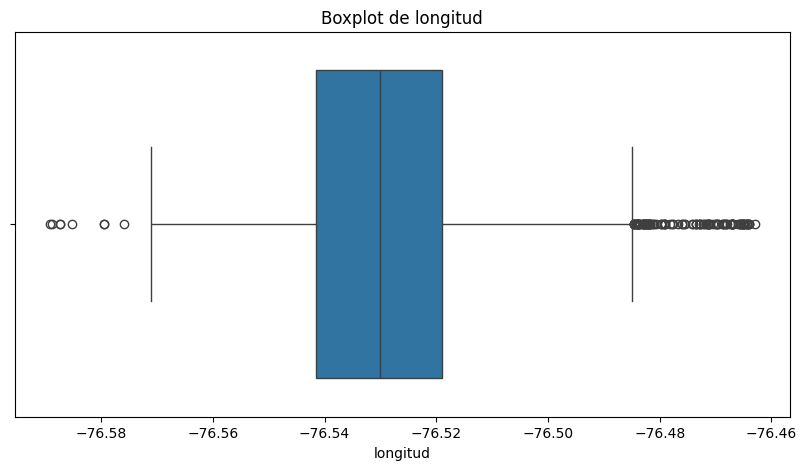

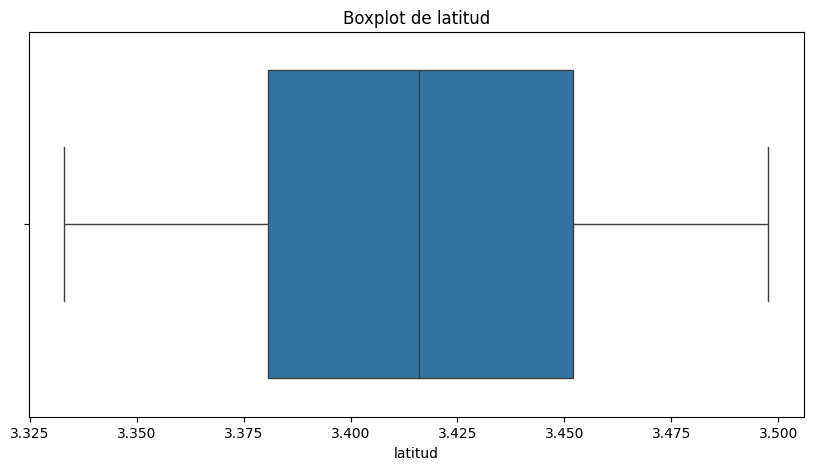

In [184]:
#ahora se grafican las variables individualmente para identificar oulliers usando la la defincion numerical_columns asignada anteriormente
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()




de estas gráficas se puede inferir que lso outliers están en aquellas viviendas que tiene particularidades de amplitud

In [185]:
# Medida de dispersión para atributos numéricos
for col in numerical_columns:
    print(f"Desviación estándar de {col}: {df[col].std()}")
    print(f"Varianza de {col}: {df[col].var()}")
    print(f"Rango de {col}: {df[col].max() - df[col].min()}")
    print(f"Coeficiente de variación de {col}: {df[col].std() / df[col].mean()}")  # Coeficiente de variación

Desviación estándar de piso: 2.6148023599182078
Varianza de piso: 6.837191381433828
Rango de piso: 11.0
Coeficiente de variación de piso: 0.69340937826701
Desviación estándar de estrato: 1.0292221492177742
Varianza de estrato: 1.0592982324404545
Rango de estrato: 3.0
Coeficiente de variación de estrato: 0.222121022630624
Desviación estándar de preciom: 328.64724426420116
Varianza de preciom: 108009.01116245349
Rango de preciom: 1941.0
Coeficiente de variación de preciom: 0.7574402946381584
Desviación estándar de areaconst: 142.96412601332753
Varianza de areaconst: 20438.741326754593
Rango de areaconst: 1715.0
Coeficiente de variación de areaconst: 0.8172416989503742
Desviación estándar de parqueaderos: 1.1249088422773093
Varianza de parqueaderos: 1.2654199034336762
Rango de parqueaderos: 9.0
Coeficiente de variación de parqueaderos: 0.6129644433825494
Desviación estándar de banios: 1.4282101645437988
Varianza de banios: 2.039784274106225
Rango de banios: 10.0
Coeficiente de variación d

In [186]:
#luego se evaluaron que varibles están correlacionadas entre sí para ver si hay alguna redundancia en los datos
correlation_matrix = df[numerical_columns].corr()
print("Matriz de correlación entre variables numéricas:")
print(correlation_matrix)



Matriz de correlación entre variables numéricas:
                  piso   estrato   preciom  areaconst  parqueaderos    banios  \
piso          1.000000  0.134859 -0.014728  -0.207902     -0.104676 -0.097494   
estrato       0.134859  1.000000  0.609807   0.274323      0.422608  0.420322   
preciom      -0.014728  0.609807  1.000000   0.687352      0.688678  0.669146   
areaconst    -0.207902  0.274323  0.687352   1.000000      0.584829  0.648416   
parqueaderos -0.104676  0.422608  0.688678   0.584829      1.000000  0.570507   
banios       -0.097494  0.420322  0.669146   0.648416      0.570507  1.000000   
habitaciones -0.227456 -0.071376  0.264091   0.516913      0.284481  0.589906   
longitud     -0.010453 -0.444140 -0.343588  -0.173743     -0.215056 -0.249570   
latitud       0.065154 -0.227499 -0.115668  -0.051888     -0.113066 -0.130037   

              habitaciones  longitud   latitud  
piso             -0.227456 -0.010453  0.065154  
estrato          -0.071376 -0.444140 -0.22

Text(0.5, 1.0, 'Mapa de Calor de Correlación entre Variables Numéricas')

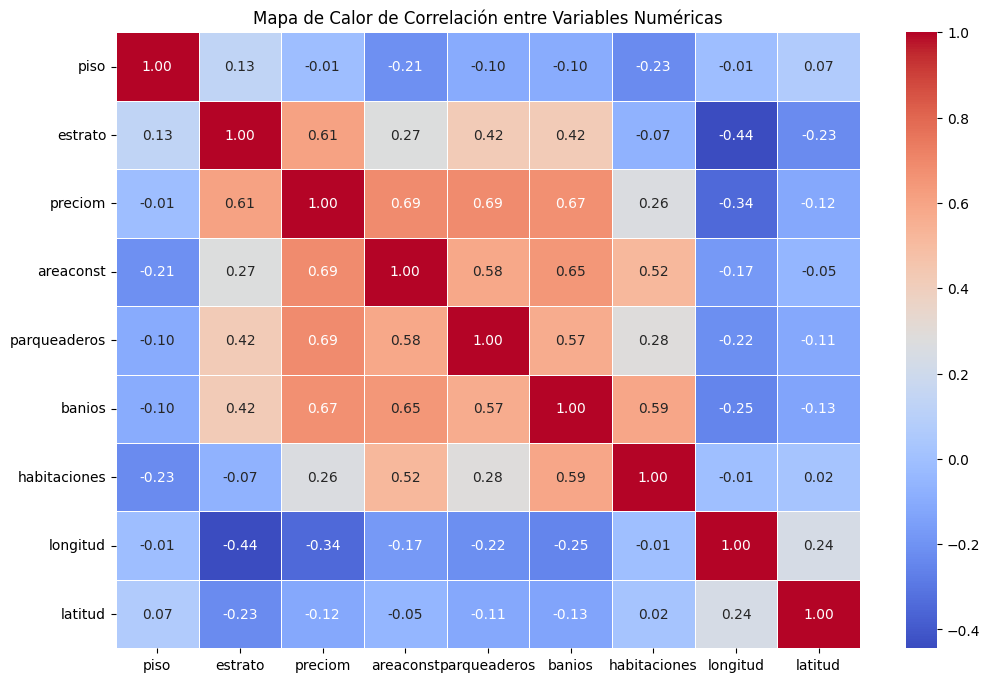

In [187]:
#ahora evaluaremos graficamos la correlación de todas las variables mediante un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')

de esta información podemos inferir:

Variables fuertemente correlacionadas

* preciom con areaconst (0.6873):Tiene sentido: a mayor área construida, mayor precio.
* preciom con parqueaderos (0.6887) y con banios (0.6691) → También lógico: más parqueaderos y baños tienden a estar en propiedades más costosas.
* areaconst con parqueaderos (0.5848) y con banios (0.6484) → Las casas más grandes tienden a tener más parqueaderos y baños.
* habitaciones con areaconst (0.5169) → Más habitaciones implica mayor área construida.

Variables con baja o casi nula correlación

* piso con preciom (≈ -0.0147) → No hay relación clara.
* latitud y longitud tienen correlaciones bajas con la mayoría, lo que indica que la ubicación no está linealmente relacionada con las otras variables (aunque podría tener relaciones no lineales).

Posible redundancia
Como preciom, areaconst, parqueaderos y banios están fuertemente correlacionadas, incluirlas todas sin control podría causar multicolinealidad en modelos lineales.Podría considerarse reducir dimensiones o elegir solo algunas de estas para evitar redundancia.

## Etapa 2: Preparación de los datos
De acuerdo a lo observado en la etapa 1, se define una secuencia de actividades que modifican los datos para eliminar las situaciones que puedan ser causa de fallo o deficiencia en el proceso de aprendizaje. En este caso se van a realizar las siguientes actividades:


1.   Completar los datos faltantes utilizando la media para atributos numéricos y la moda para atributos categóricos.
2.   Convertir los atributos categóricos a escala numérica.
3.   Normalizar los valores de algunos los atributos.

In [188]:
#hace una copia del dataframe para trabajar con los datos sin modificar el original
df_clean = df.copy()
# Eliminmos la fila id que trae datos redundantes y no aporta información relevante para el análisis
df_clean = df_clean.drop(columns=["id"])


In [189]:
# en esta etapa se imputan los valores nulos en el DataFrame df_clean verificando el tipo de dato de cada columna imputando la moda en varaibles categóricas y la media en variables numéricas.
for col in  df_clean.columns:
    if df_clean[col].isnull().sum() > 0:  # Verifica si hay valores nulos en la columna
        if df_clean[col].dtype == 'object':  # Si es una variable categórica
            moda = df_clean[col].mode()[0]  # Calcula la moda
            df_clean[col].fillna(moda, inplace=True)  # Imputa la moda
        else:  # Si es una variable numérica
            media = df_clean[col].mean()  # Calcula la media
            df_clean[col].fillna(media, inplace=True)  # Imputa la media
# Verifica nuevamente si hay valores nulos

print("Valores nulos después de la imputación:")
df_clean.isnull().sum()

Valores nulos después de la imputación:


/tmp/ipython-input-2056530347.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(moda, inplace=True)  # Imputa la moda
/tmp/ipython-input-2056530347.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,0
zona,0
piso,0
estrato,0
preciom,0
areaconst,0
parqueaderos,0
banios,0
habitaciones,0
tipo,0
barrio,0


In [190]:
df_clean.head()  # Muestra las primeras filas del DataFrame limpio

,zona,piso,estrato,preciom,areaconst,parqueaderos,banios,habitaciones,tipo,barrio,longitud,latitud
0,Zona Oriente,3.770936,3.0,250.0,70.0,1.0,3.0,6.0,Casa,20 de julio,-76.51168,3.43382
1,Zona Oriente,3.770936,3.0,320.0,120.0,1.0,2.0,3.0,Casa,20 de julio,-76.51237,3.43369
2,Zona Oriente,3.770936,3.0,350.0,220.0,2.0,2.0,4.0,Casa,20 de julio,-76.51537,3.43566
3,Zona Sur,2.000000,4.0,400.0,280.0,3.0,5.0,3.0,Casa,3 de julio,-76.54000,3.43500
4,Zona Norte,1.000000,5.0,260.0,90.0,1.0,2.0,3.0,Apartamento,acopi,-76.51350,3.45891


In [191]:
from sklearn.preprocessing import LabelEncoder

# Codifica las variables categóricas usando LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le  # Guarda el codificador para uso futuro

# Verifica si lablel encoders están funcionando correctamente
print("Datos después de codificar variables categóricas:")
print(df_clean[categorical_columns].head())

Datos después de codificar variables categóricas:
   zona  tipo  barrio
0     3     1       0
1     3     1       0
2     3     1       0
3     4     1       1
4     1     0      34


In [192]:
#ahora vamos a normalizar los datos para que tengan una media de 0 y una desviación estándar de 1
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df_clean = preprocessing.scale(df_clean)  # Normaliza las columnas
print("Datos normalizados:")
print(df_clean[:5])  # Muestra las primeras 5 filas del DataFrame normal

Datos normalizados:
[[ 6.16394238e-02  2.05521083e-16 -1.58760920e+00 -5.59642915e-01
  -7.34171353e-01 -8.26473046e-01 -7.79564655e-02  1.64107848e+00
   1.25907702e+00 -2.09457843e+00  9.73080513e-01  3.79462018e-01]
 [ 6.16394238e-02  2.05521083e-16 -1.58760920e+00 -3.46610182e-01
  -3.84349184e-01 -8.26473046e-01 -7.78301862e-01 -4.14862267e-01
   1.25907702e+00 -2.09457843e+00  9.33411860e-01  3.76412396e-01]
 [ 6.16394238e-02  2.05521083e-16 -1.58760920e+00 -2.55310439e-01
   3.15295154e-01  1.63084788e-01 -7.78301862e-01  2.70451315e-01
   1.25907702e+00 -2.09457843e+00  7.60939453e-01  4.22625910e-01]
 [ 8.14889474e-01 -8.19575592e-01 -6.15768071e-01 -1.03144202e-01
   7.35081757e-01  1.15264262e+00  1.32273433e+00 -4.14862267e-01
   1.25907702e+00 -2.08634719e+00 -6.55059004e-01  4.07143210e-01]
 [-1.44486068e+00 -1.28236793e+00  3.56073056e-01 -5.29209667e-01
  -5.94242486e-01 -8.26473046e-01 -7.78301862e-01 -4.14862267e-01
  -7.94232591e-01 -1.81471642e+00  8.68447253e-01  9

In [193]:
#calculamos la matriz de covarianza
cov_matrix = np.cov(df_clean.T)  # Transponemos para que las variables  estén en columnas
print("Matriz de covarianza:")
print(cov_matrix)  # Muestra la matriz de covarianza

Matriz de covarianza:
[[ 1.00012018 -0.06122243  0.11097062  0.01606713  0.0079483   0.01977165
   0.07754451  0.02159315  0.05379464  0.03102181 -0.16742257 -0.73909958]
 [-0.06122243  1.00012018  0.10846013 -0.0118646  -0.16423851 -0.08199214
  -0.0786935  -0.18032337 -0.36645428  0.08171493 -0.00851147  0.05388692]
 [ 0.11097062  0.10846013  1.00012018  0.60987626  0.27435629  0.35033852
   0.42037229 -0.07138472 -0.11453267  0.00104403 -0.44419377 -0.22752678]
 [ 0.01606713 -0.0118646   0.60987626  1.00012018  0.68743044  0.63089798
   0.66922198  0.26412136  0.25648964 -0.03312906 -0.34362745 -0.11568077]
 [ 0.0079483  -0.16423851  0.27435629  0.68743044  1.00012018  0.5297408
   0.6484944   0.51697504  0.5472535  -0.0688075  -0.17376371 -0.05189404]
 [ 0.01977165 -0.08199214  0.35033852  0.63089798  0.5297408   1.00012018
   0.49545908  0.23897269  0.27634659 -0.06645012 -0.18240651 -0.10203647]
 [ 0.07754451 -0.0786935   0.42037229  0.66922198  0.6484944   0.49545908
   1.000120

Text(0.5, 1.0, 'Matriz de Covarianza de Variables Numéricas')

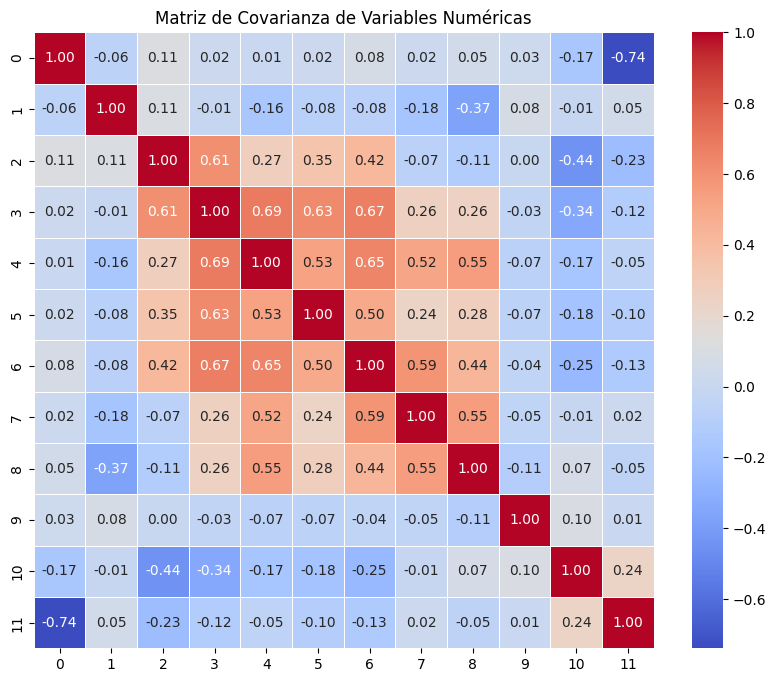

In [194]:

# vamos a visualizar la matriz de covarianza
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Covarianza de Variables Numéricas')

## Paso 1: Aplicar PCA y Determinar el Número de Componentes
Primero, aplicaremos PCA a tus datos normalizados (df_clean) para transformar las variables correlacionadas en un conjunto de variables no correlacionadas (componentes). Luego, analizaremos cuánta "información" (varianza) explica cada componente para decidir con cuántos nos quedamos.

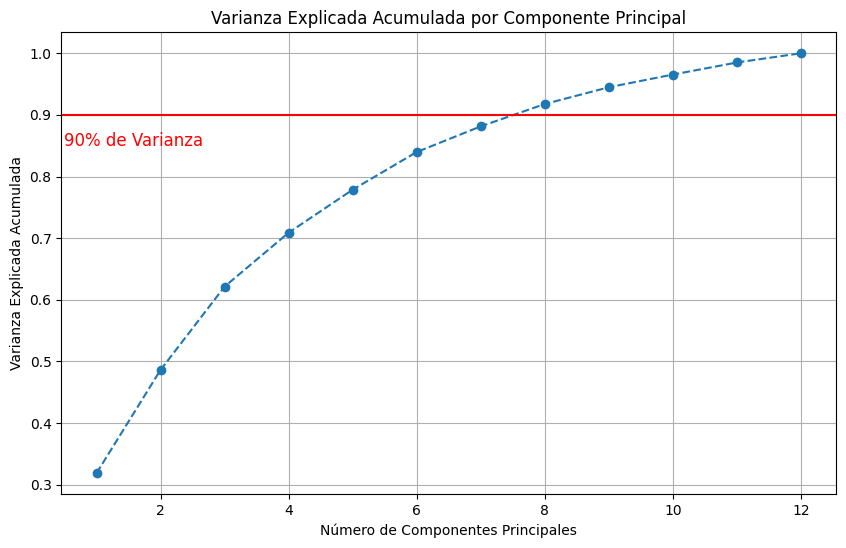

In [195]:
# df_clean es el array de numpy normalizado que obtuviste en el último paso

# 1. Aplicar PCA
pca = PCA() # Inicialmente, no definimos el número de componentes para analizar todos
df_pca_full = pca.fit_transform(df_clean)

# 2. Calcular la Varianza Explicada Acumulada
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)

# 3. Graficar la Varianza Explicada para encontrar el "codo"
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='-') # Línea para el 90% de varianza
plt.text(0.5, 0.85, '90% de Varianza', color = 'red', fontsize=12)
plt.show()

El gráfico anterior nos muestra cuánta de la varianza total de los datos es capturada por los componentes. Buscamos un "codo" en la curva, que es el punto donde agregar un nuevo componente ya no aporta mucha información nueva. Generalmente, se busca retener entre el 85% y el 95% de la varianza. En este caso, 4 o 5 componentes parecen suficientes para capturar más del 90% de la información.

## Paso 2: Aplicar PCA con el Número de Componentes Seleccionado
Ahora que hemos decidido usar (por ejemplo) 4 componentes, volvemos a ejecutar PCA con ese número específico.

In [196]:
# Aplicar PCA con el número óptimo de componentes (ej. 4)
n_componentes_optimo = 4
pca = PCA(n_components=n_componentes_optimo)
df_pca_reducido = pca.fit_transform(df_clean)

# Convertir el resultado a un DataFrame para facilitar su uso posterior
df_pca = pd.DataFrame(data=df_pca_reducido, columns=[f'Componente Principal {i+1}' for i in range(n_componentes_optimo)])

print("Primeras 5 filas del DataFrame con Componentes Principales:")
print(df_pca.head())

Primeras 5 filas del DataFrame con Componentes Principales:
   Componente Principal 1  Componente Principal 2  Componente Principal 3  \
0               -0.573386                2.268204                1.433010   
1               -1.239613                1.540495                1.027828   
2               -0.313004                1.810013                0.921690   
3                1.678129                0.662928                0.819542   
4               -1.549298                1.050498               -0.825585   

   Componente Principal 4  
0               -1.343292  
1               -1.703841  
2               -1.619986  
3               -2.064194  
4               -2.122926  


## Paso 3: Encontrar el Número Óptimo de Clústeres (Segmentos) con K-Means
Usaremos el "Método del Codo" sobre nuestros datos reducidos por PCA para decidir cuántos segmentos de viviendas existen.

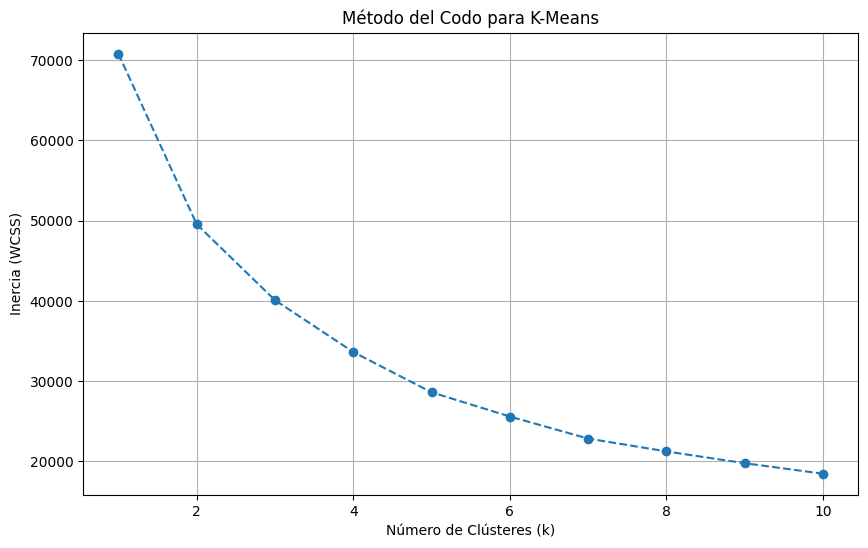

In [197]:
# Usar el método del codo para encontrar el número óptimo de clústeres
inercia = []
rango_clusters = range(1, 11) # Probaremos de 1 a 10 clústeres

for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inercia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(rango_clusters, inercia, marker='o', linestyle='--')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia (WCSS)')
plt.grid(True)
plt.show()

Análisis del gráfico: Al igual que antes, buscamos el "codo", el punto donde la curva se aplana. Este punto representa el balance ideal entre tener pocos clústeres y minimizar la distancia dentro de cada uno. Para estos datos, un valor de k=4 parece ser un buen punto de codo.

### Paso 4: Realizar la Segmentación con K-Means y Visualizar
Finalmente, aplicamos K-Means con el número óptimo de clústeres (k=4) y visualizamos los segmentos resultantes.

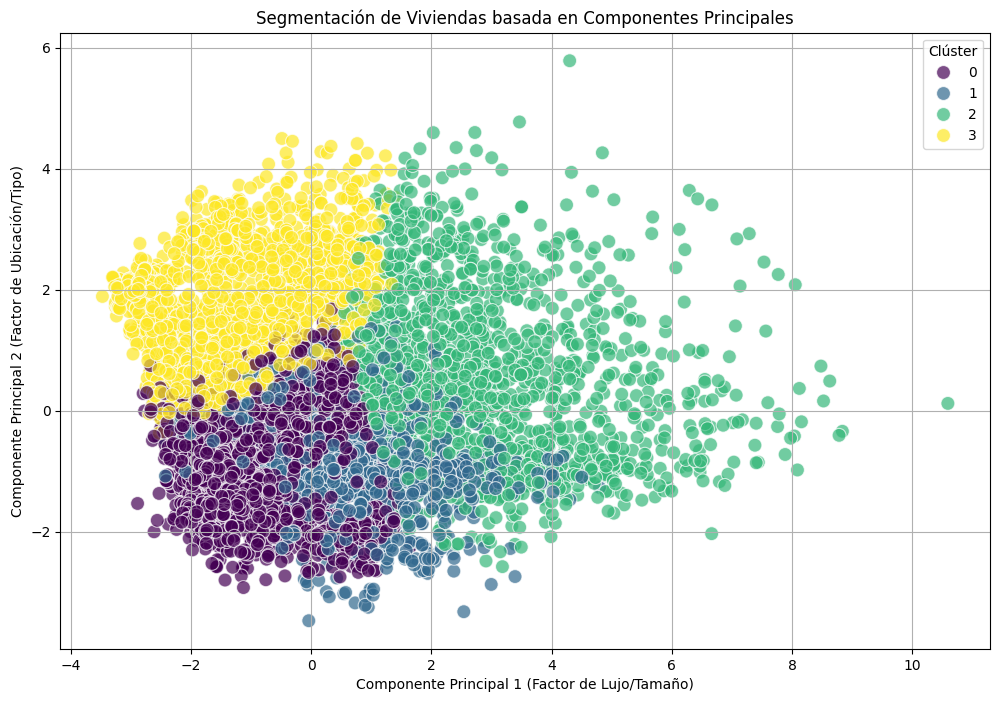

In [198]:
# Aplicar K-Means con el número óptimo de clústeres
k_optimo = 4
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_pca)

# Añadir la etiqueta del clúster a nuestro DataFrame de PCA
df_pca['cluster'] = clusters

# Visualizar los clústeres usando los dos primeros componentes principales
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Segmentación de Viviendas basada en Componentes Principales')
plt.xlabel('Componente Principal 1 (Factor de Lujo/Tamaño)')
plt.ylabel('Componente Principal 2 (Factor de Ubicación/Tipo)')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

Paso 5: Interpretar los Segmentos
Este es el paso final y más importante: entender qué significa cada clúster. Para ello, agregamos las etiquetas de clúster al DataFrame original (antes de la normalización) y analizamos las características promedio de cada segmento.

In [199]:
from sklearn.preprocessing import LabelEncoder

# 1. Crea una copia limpia del DataFrame original para el análisis
df_interpretacion = df.copy()
df_interpretacion = df_interpretacion.drop(columns=["id"])

# 2. Imputa los valores faltantes (igual que antes)
for col in df_interpretacion.columns:
    if df_interpretacion[col].isnull().sum() > 0:
        if df_interpretacion[col].dtype == 'object':
            moda = df_interpretacion[col].mode()[0]
            # Usando la sintaxis recomendada por la advertencia
            df_interpretacion[col] = df_interpretacion[col].fillna(moda)
        else:
            media = df_interpretacion[col].mean()
            df_interpretacion[col] = df_interpretacion[col].fillna(media)

categorical_columns = ['zona', 'tipo', 'barrio']
for col in categorical_columns:
    le = LabelEncoder()
    df_interpretacion[col] = le.fit_transform(df_interpretacion[col])

df_interpretacion['cluster'] = clusters

# 5. Ahora sí, analiza las características promedio de cada clúster
segmentos = df_interpretacion.groupby('cluster').mean()

print("Características promedio por segmento:")
print(segmentos)

Características promedio por segmento:
             zona      piso   estrato     preciom   areaconst  parqueaderos  \
cluster                                                                       
0        3.916279  3.896460  4.492372  270.781328  100.876761      1.386910   
1        2.031030  5.303732  5.669252  676.890691  179.625183      2.175974   
2        3.404255  2.742032  5.052904  751.155837  360.802266      2.780780   
3        1.471649  3.364206  3.735567  243.035052  128.008943      1.483709   

           banios  habitaciones      tipo      barrio   longitud   latitud  
cluster                                                                     
0        2.437933      3.011416  0.192558  271.420775 -76.529707  3.390038  
1        3.557123      3.128350  0.035966  254.117066 -76.541957  3.440573  
2        4.873491      5.210466  0.963772  231.758482 -76.533924  3.400601  
3        2.325258      3.502577  0.448969  246.895361 -76.512249  3.462055  


In [200]:
# Usamos el DataFrame original 'df' con los datos limpios de nulos ya que este tipo de analisis requiere las variables categóricas

df_limpio = df.copy()
df_limpio = df_limpio.dropna(subset=['tipo', 'zona']) # Asegurarnos de no tener nulos en estas columnas

# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(df_limpio['tipo'], df_limpio['zona'])

print("Tabla de Contingencia (Tipo de Vivienda vs. Zona):")
print(tabla_contingencia)

Tabla de Contingencia (Tipo de Vivienda vs. Zona):
zona         Zona Centro  Zona Norte  Zona Oeste  Zona Oriente  Zona Sur
tipo                                                                    
Apartamento           24        1198        1029            62      2787
Casa                 100         722         169           289      1939


In [201]:
# ahora se realiza un chi-cuadrado para ver si hay una relación significativa entre las variables categóricas tipo y zona
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Chi-cuadrado: {chi2}, p-valor: {p}")

Chi-cuadrado: 690.9297286417828, p-valor: 3.207561060273126e-148


con un p-valor extremadamente pequeño, rechazamos la hipótesis nula de independencia entre tipo y zona. Es decir: el tipo de vivienda y la zona están fuertemente asociados — la distribución de apartamentos y casas no es la misma en todas las zonas.

zona,Zona Centro,Zona Norte,Zona Oeste,Zona Oriente,Zona Sur
tipo,,,,,
Apartamento,-5.966224,0.610214,10.869185,-10.442512,-2.049089
Casa,7.509727,-0.768080,-13.681117,13.144061,2.579202


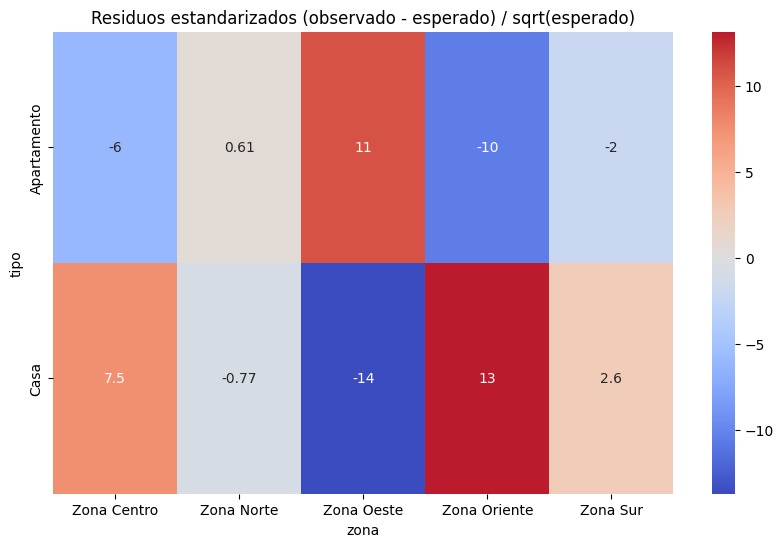

In [202]:
resid = (tabla_contingencia - expected) / np.sqrt(expected)
display(resid)

plt.figure(figsize=(10,6))
sns.heatmap(resid, annot=True, cmap='coolwarm', center=0)
plt.title('Residuos estandarizados (observado - esperado) / sqrt(esperado)')
plt.show()


In [203]:
display(pd.DataFrame(expected, index=tabla_contingencia.index, columns=tabla_contingencia.columns))


zona,Zona Centro,Zona Norte,Zona Oeste,Zona Oriente,Zona Sur
tipo,,,,,
Apartamento,76.018752,1177.064551,734.439235,215.182113,2897.295348
Casa,47.981248,742.935449,463.560765,135.817887,1828.704652


In [204]:
# --- PRE-PROCESAMIENTO: Manejar valores NA en las columnas categóricas ---
df_cleaned = df.copy()
df_cleaned['tipo'] = df_cleaned['tipo'].fillna('Desconocido_Tipo')
df_cleaned['zona'] = df_cleaned['zona'].fillna('Desconocido_Zona')
df_cleaned['barrio'] = df_cleaned['barrio'].fillna('Desconocido_Barrio')

# --- 1. Análisis de Correspondencias: Tipo de Vivienda (columna 'tipo') vs. Zona ---
print("--- Análisis de Correspondencias: Tipo de Vivienda (tipo) vs. Zona ---")

# Crear la tabla de contingencia
contingency_tipo_zona = pd.crosstab(df_cleaned['tipo'], df_cleaned['zona'])
print("\nTabla de Contingencia (Tipo de Vivienda vs. Zona):")
print(contingency_tipo_zona)

--- Análisis de Correspondencias: Tipo de Vivienda (tipo) vs. Zona ---

Tabla de Contingencia (Tipo de Vivienda vs. Zona):
zona              Desconocido_Zona  Zona Centro  Zona Norte  Zona Oeste  \
tipo                                                                      
Apartamento                      0           24        1198        1029   
Casa                             0          100         722         169   
Desconocido_Tipo                 3            0           0           0   

zona              Zona Oriente  Zona Sur  
tipo                                      
Apartamento                 62      2787  
Casa                       289      1939  
Desconocido_Tipo             0         0  


In [205]:
# --- 2. Realizar el Análisis de Correspondencias (CA) ---
ca = prince.CA(
n_components=2, # Usualmente 2 para visualización en un plano
n_iter=3,
copy=True,
check_input=True,
random_state=42 # Para reproducibilidad
)

# Ajustar el modelo a tu tabla de contingencia
ca = ca.fit(contingency_tipo_zona)

# --- 3. Obtener y mostrar las coordenadas de filas y columnas ---
row_coords = ca.row_coordinates(contingency_tipo_zona)
col_coords = ca.column_coordinates(contingency_tipo_zona)

print("\nCoordenadas de Filas (primeras 5):")
print(row_coords.head())

print("\nCoordenadas de Columnas:")
print(col_coords)


Coordenadas de Filas (primeras 5):
                          0             1
tipo                                     
Apartamento       -0.018990 -2.289998e-01
Casa              -0.018990  3.628142e-01
Desconocido_Tipo  52.659282 -1.043345e-14

Coordenadas de Columnas:
                          0         1
zona                                 
Desconocido_Zona  52.659282  0.000000
Zona Centro       -0.018990  0.861474
Zona Norte        -0.018990 -0.022392
Zona Oeste        -0.018990 -0.504919
Zona Oriente      -0.018990  0.896200
Zona Sur          -0.018990  0.047926



Generando gráfico de Análisis de Correspondencias (Tipo de Vivienda vs. Zona)...


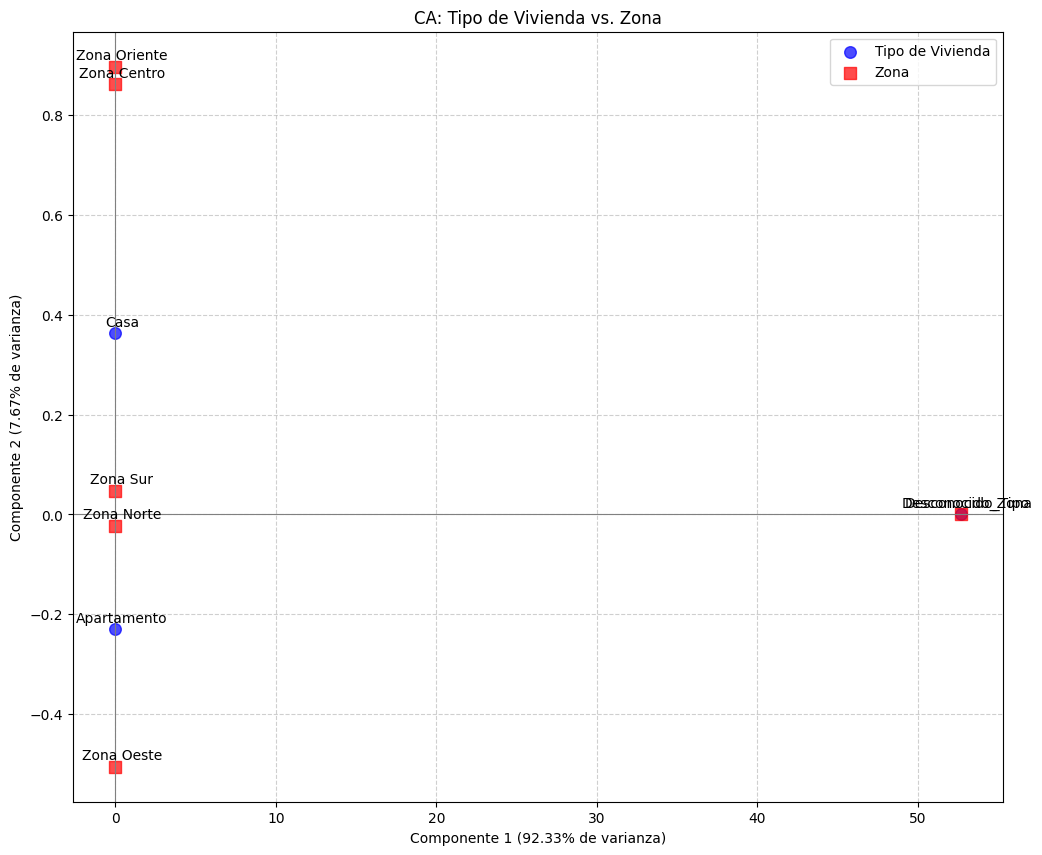


Variancia explicada (Tipo de Vivienda vs. Zona):
          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              1.000        92.33%                     92.33%
1              0.083         7.67%                    100.00%


In [206]:
# --- OBTENER COORDENADAS PARA LA VISUALIZACIÓN ---
row_coords_tipo_zona = ca_tipo_zona.row_coordinates(contingency_tipo_zona)
col_coords_tipo_zona = ca_tipo_zona.column_coordinates(contingency_tipo_zona)

# --- VISUALIZAR USANDO MATPLOTLIB DIRECTAMENTE ---
print("\nGenerando gráfico de Análisis de Correspondencias (Tipo de Vivienda vs. Zona)...")
plt.figure(figsize=(12, 10))

# Puntos de filas (Tipo de Vivienda)
plt.scatter(row_coords_tipo_zona.iloc[:, 0], row_coords_tipo_zona.iloc[:, 1],
        marker='o', color='blue', s=70, alpha=0.7, label='Tipo de Vivienda')
for i, txt in enumerate(row_coords_tipo_zona.index):
  plt.annotate(txt, (row_coords_tipo_zona.iloc[i, 0], row_coords_tipo_zona.iloc[i, 1]),
             textcoords="offset points", xytext=(5,5), ha='center')

# Puntos de columnas (Zona)
plt.scatter(col_coords_tipo_zona.iloc[:, 0], col_coords_tipo_zona.iloc[:, 1],
        marker='s', color='red', s=70, alpha=0.7, label='Zona')
for i, txt in enumerate(col_coords_tipo_zona.index):
  plt.annotate(txt, (col_coords_tipo_zona.iloc[i, 0], col_coords_tipo_zona.iloc[i, 1]),
             textcoords="offset points", xytext=(5,5), ha='center')

plt.title('CA: Tipo de Vivienda vs. Zona')

# --- LÍNEAS CORREGIDAS (AÑADIENDO .replace('%', '')) ---
# Obtener el valor como cadena, eliminar el '%' y luego convertir a float
variance_component1 = float(ca_tipo_zona.eigenvalues_summary.iloc[0, 1].replace('%', ''))
variance_component2 = float(ca_tipo_zona.eigenvalues_summary.iloc[1, 1].replace('%', ''))

plt.xlabel(f'Componente 1 ({variance_component1:.2f}% de varianza)')
plt.ylabel(f'Componente 2 ({variance_component2:.2f}% de varianza)')
# --- FIN LÍNEAS CORREGIDAS ---

plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.legend()
plt.show()

print("\nVariancia explicada (Tipo de Vivienda vs. Zona):")
print(ca_tipo_zona.eigenvalues_summary)
